In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading CSV data file
concrete=pd.read_csv("concrete.csv")
concrete.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [3]:
#all features are float or type int and donot have missing data
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
#no missing values
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
#There are many zeros in 3 features, believe those are the missing value and have been entered as 0.
#Need to update the same
print(concrete[concrete==0].count(axis=0))
print("\nPercentage of zeros\n")
print(round(concrete[concrete==0].count(axis=0)/len(concrete.index)*100,2))

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

Percentage of zeros

cement           0.00
slag            45.73
ash             54.95
water            0.00
superplastic    36.80
coarseagg        0.00
fineagg          0.00
age              0.00
strength         0.00
dtype: float64


In [6]:
#replacing zeros with NaN's
#concrete.replace(0,np.nan,inplace=True)
#checking for zeros now
#print("Zeros now in data")
#print(concrete[concrete==0].count(axis=0))
#checking missing now, need to look at them. First lets study features.
#print("\nNow missing values in data")
#print(concrete.isnull().sum())

#### UNIVARIATE DISTRIBUTION

In [7]:
#diff between mean and 50% is normal in most variable except age which is as expected
#cemet, slag,water, superplastic, fineagg, strength have tail towards right
#ash, coarseagg have tail towards left
#age has very lonf tail towards right
concrete.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

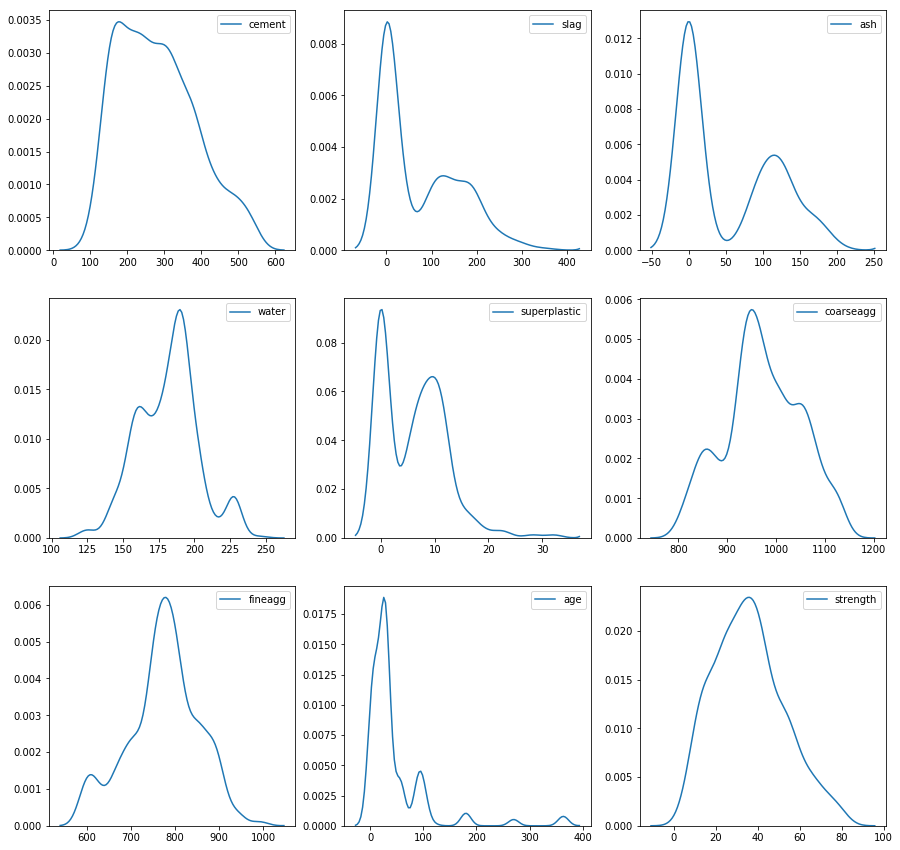

In [8]:
#kdeplot
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.kdeplot(concrete['cement'])
plt.subplot(3,3,2)
sns.kdeplot(concrete['slag'])
plt.subplot(3,3,3)
sns.kdeplot(concrete['ash'])
plt.subplot(3,3,4)
sns.kdeplot(concrete['water'])
plt.subplot(3,3,5)
sns.kdeplot(concrete['superplastic'])
plt.subplot(3,3,6)
sns.kdeplot(concrete['coarseagg'])
plt.subplot(3,3,7)
sns.kdeplot(concrete['fineagg'])
plt.subplot(3,3,8)
sns.kdeplot(concrete['age'])
plt.subplot(3,3,9)
sns.kdeplot(concrete['strength'])

In [9]:
#Data is multimodal. Age and superplastic have tail at right end.will have a better picture on data
#after vieweing interaction between 2 variables.

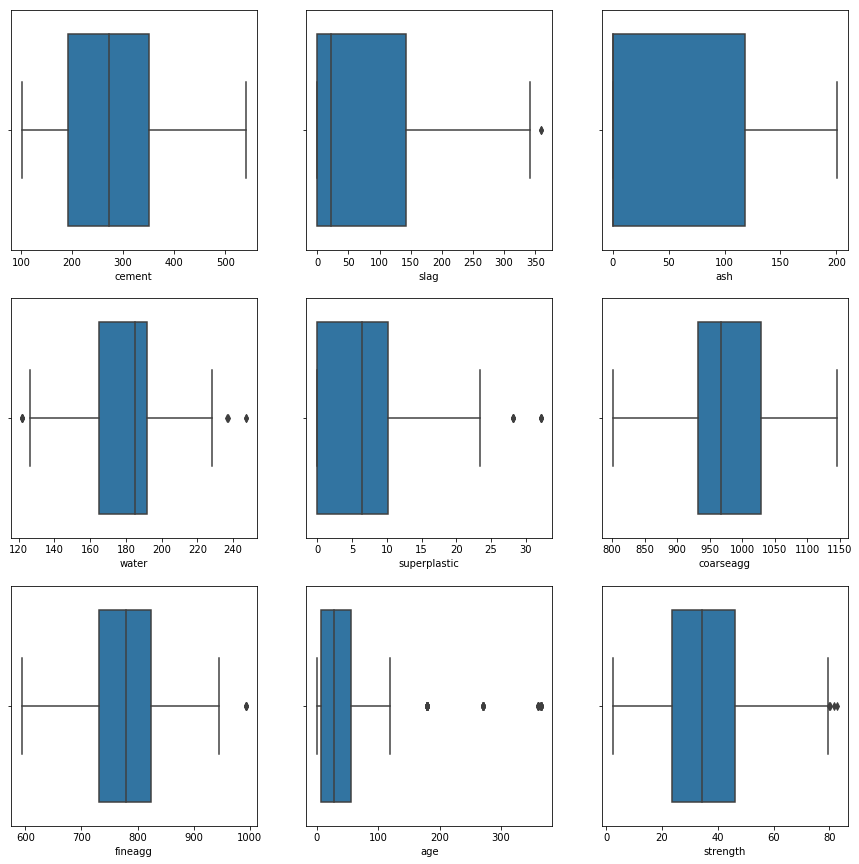

In [10]:
#boxplot
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(concrete['cement'])
plt.subplot(3,3,2)
sns.boxplot(concrete['slag'])
plt.subplot(3,3,3)
sns.boxplot(concrete['ash'])
plt.subplot(3,3,4)
sns.boxplot(concrete['water'])
plt.subplot(3,3,5)
sns.boxplot(concrete['superplastic'])
plt.subplot(3,3,6)
sns.boxplot(concrete['coarseagg'])
plt.subplot(3,3,7)
sns.boxplot(concrete['fineagg'])
plt.subplot(3,3,8)
sns.boxplot(concrete['age'])
plt.subplot(3,3,9)
sns.boxplot(concrete['strength'])

In [11]:
#For now ignoring all outlier points as we dont have subject knowledge of concrete mixes.

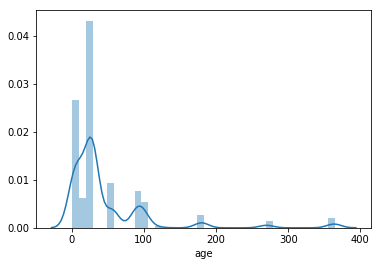

In [12]:
sns.distplot(concrete['age'])

In [13]:
#Max data points is for 28 days concrete age
concrete['age'].value_counts().sort_index()

1        2
3      134
7      126
14      62
28     425
56      91
90      54
91      22
100     52
120      3
180     26
270     13
360      6
365     14
Name: age, dtype: int64

#### BIVARIATE DISTRIBUTION

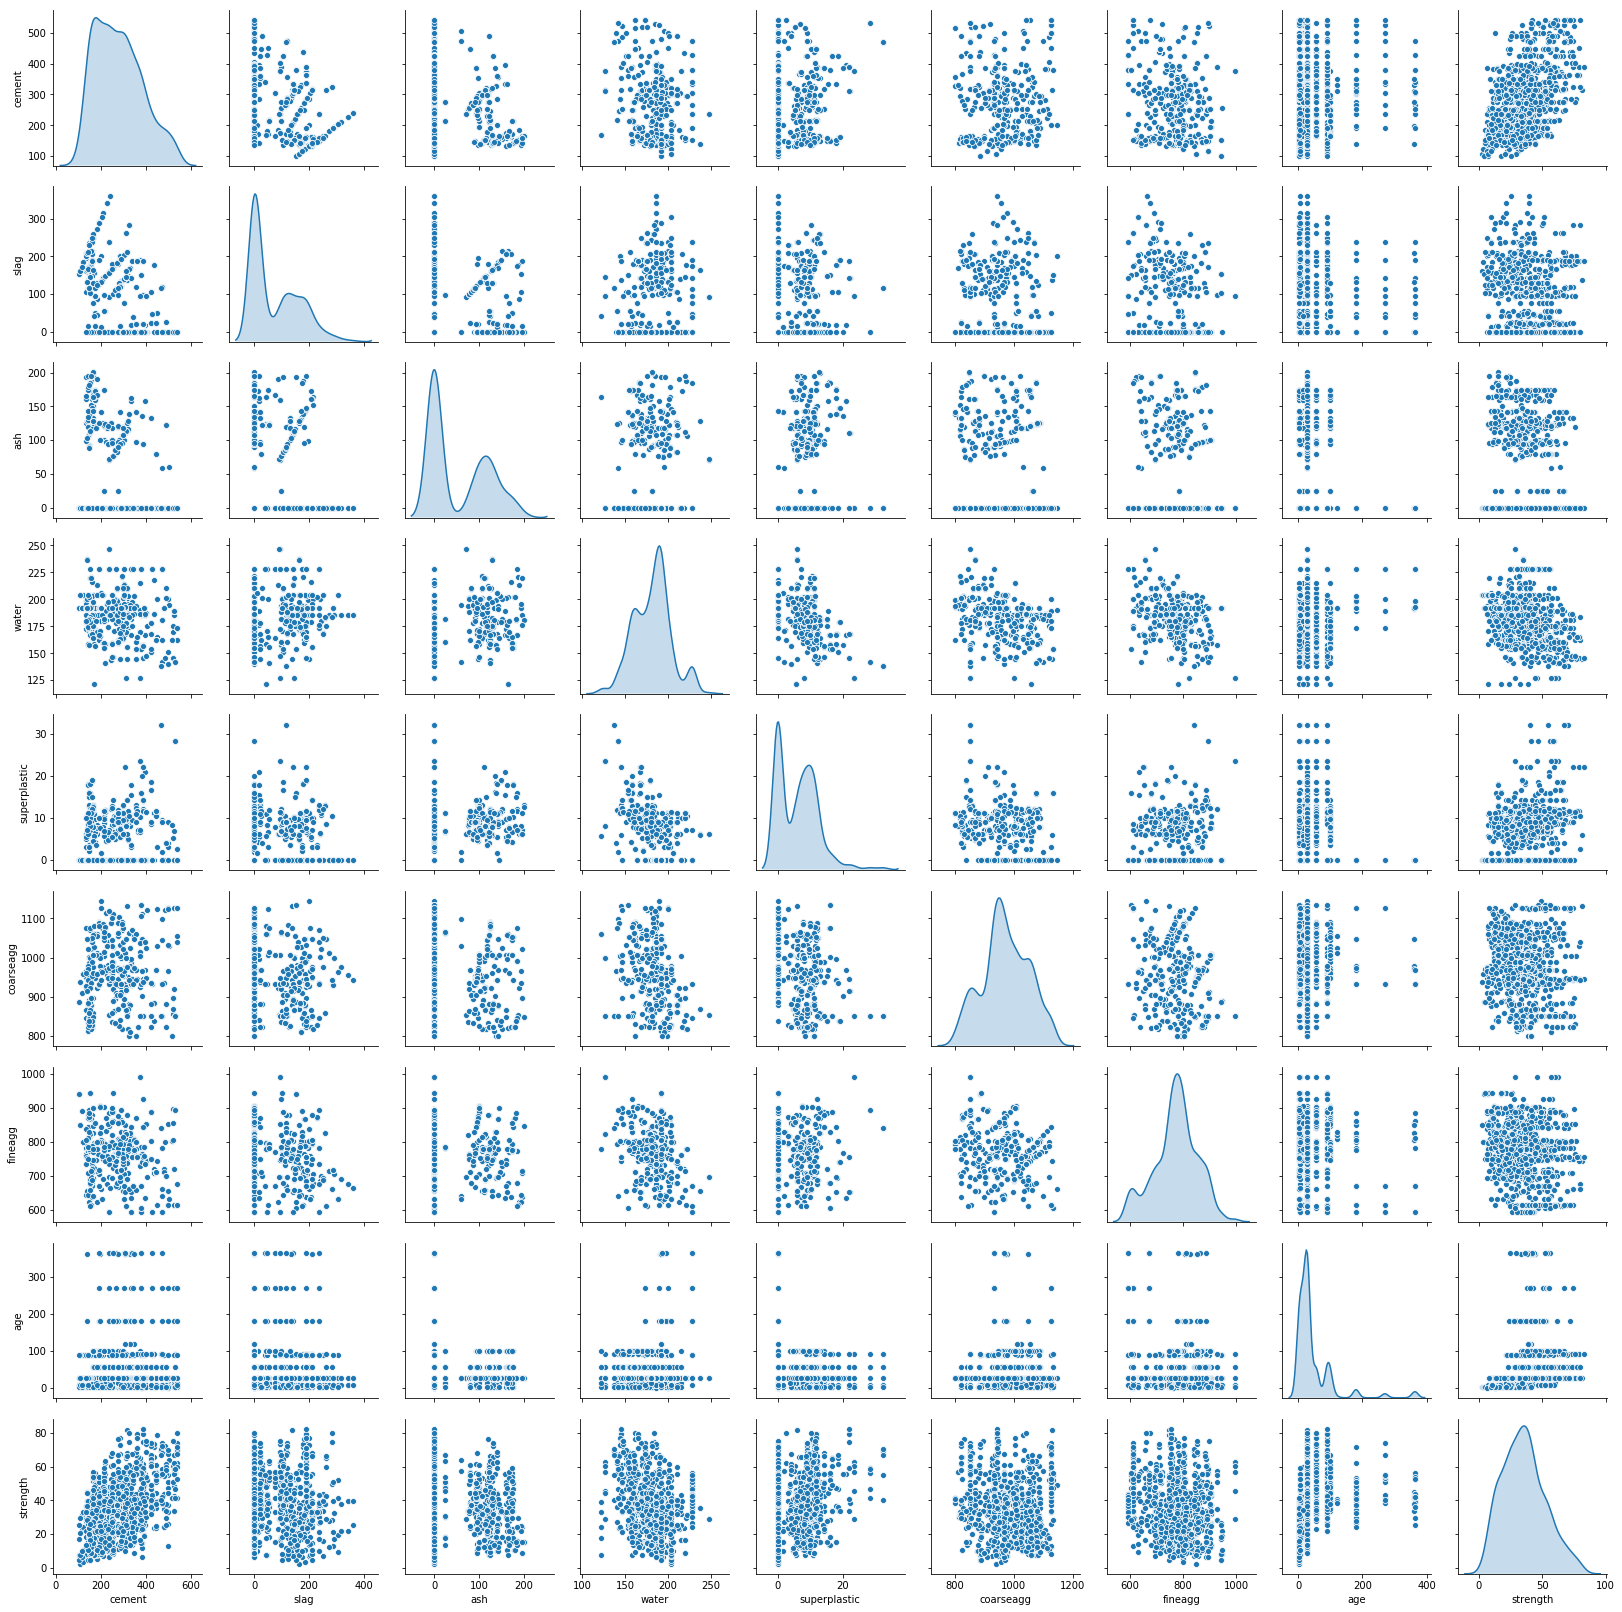

In [14]:
sns.pairplot(concrete,diag_kind='kde')

In [15]:
#Cement and strength seem to have a positive relation, superplastic and water have a -ive relation. Rest have 
#weak relation with each other. The same could be seen in heatmap below.
#Also, as age of concrete strength increases, in graph we can see low strength value is not there as age increases.

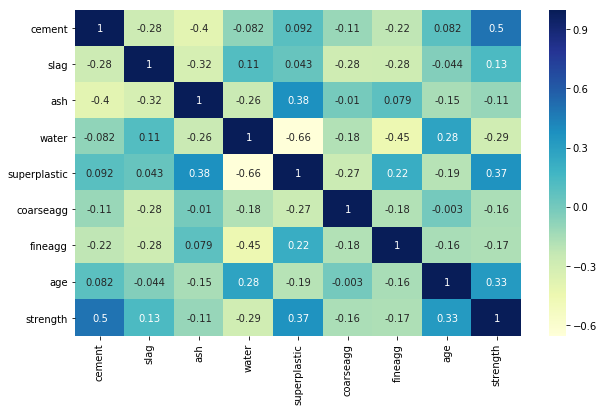

In [16]:
corr=concrete.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='YlGnBu')

### Its generally said that, concrete strength have reached 99% in 28 days, still concrete continues to gain strength after that period, but that rate of gain in compressive strength is very less compared to that in 28 days. 
### After 14 days of casting concrete, concrete gains only 9% in next 14 days. So, rate of gain of strength decreases.

In [17]:
#As per above, binning age to observe data
def bal_group(series):
    if 1 <= series <= 15:
        return "1. 1-15 days"
    elif 16 <= series <= 30:
        return "2. 16-30 days"
    elif 31 <= series <= 90:
        return "3. 1-3 months"
    elif 91 <= series:
        return "4. 3 months+"

concrete['age_group'] = concrete['age'].apply(bal_group)

In [18]:
#Also binning strength to observe data
def bal_group(series):
    if 1 <= series <= 17:
        return "1. Low"
    elif 17 < series <= 28:
        return "2. Medium"
    elif 28 < series:
        return "3. High"

concrete['strength_group'] = concrete['strength'].apply(bal_group)

In [19]:
print("Age Grouping")
print(concrete.age_group.value_counts().sort_index()/len(concrete.age_group)*100)

print("\nStrength Grouping")
print(concrete.strength_group.value_counts().sort_index()/len(concrete.strength_group)*100)

Age Grouping
1. 1-15 days     31.456311
2. 16-30 days    41.262136
3. 1-3 months    14.077670
4. 3 months+     13.203883
Name: age_group, dtype: float64

Strength Grouping
1. Low       14.368932
2. Medium    20.679612
3. High      64.951456
Name: strength_group, dtype: float64


<Figure size 288x288 with 0 Axes>

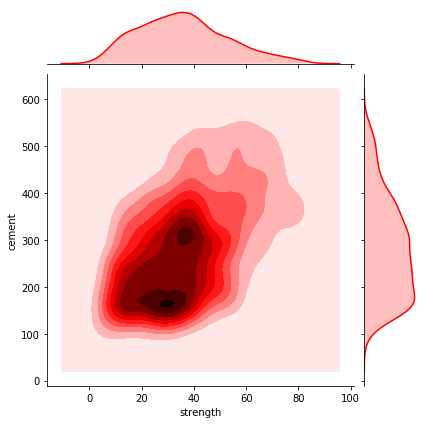

In [20]:
#cement and strength distribution
plt.figure(figsize=(4,4))
sns.jointplot(concrete['strength'],concrete['cement'],kind='kde',color='Red')

<Figure size 288x288 with 0 Axes>

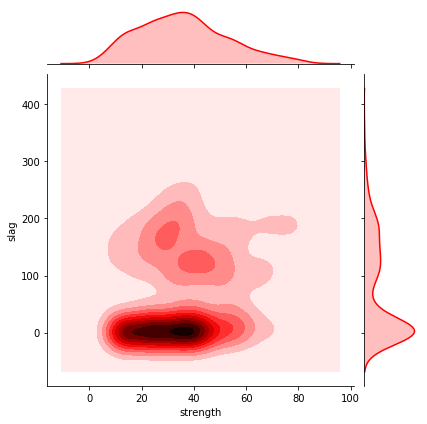

In [21]:
#slag and strength distribution
plt.figure(figsize=(4,4))
sns.jointplot(concrete['strength'],concrete['slag'],kind='kde',color='Red')

<Figure size 288x288 with 0 Axes>

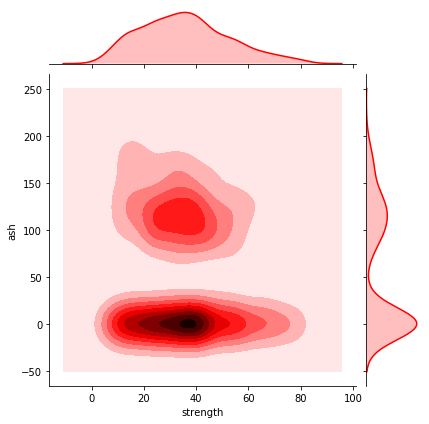

In [22]:
#ash and strength distribution
plt.figure(figsize=(4,4))
sns.jointplot(concrete['strength'],concrete['ash'],kind='kde',color='Red')

<Figure size 288x288 with 0 Axes>

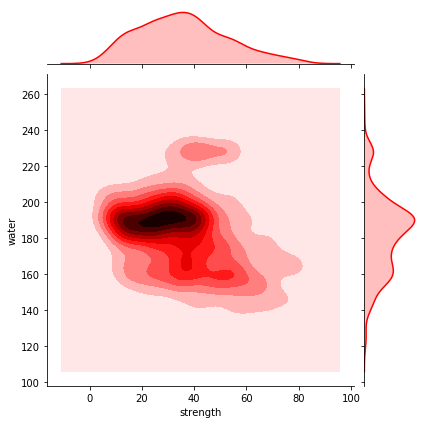

In [23]:
#water and strength distribution
plt.figure(figsize=(4,4))
sns.jointplot(concrete['strength'],concrete['water'],kind='kde',color='Red')

<Figure size 288x288 with 0 Axes>

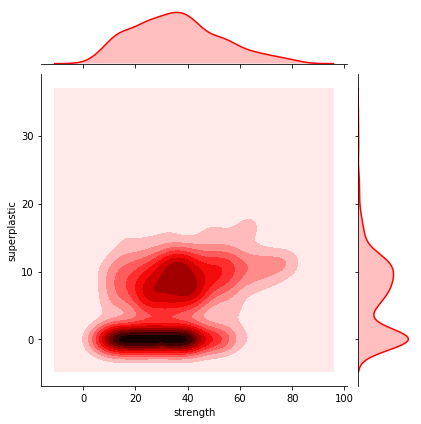

In [24]:
#superplastic and strength distribution
plt.figure(figsize=(4,4))
sns.jointplot(concrete['strength'],concrete['superplastic'],kind='kde',color='Red')

<Figure size 288x288 with 0 Axes>

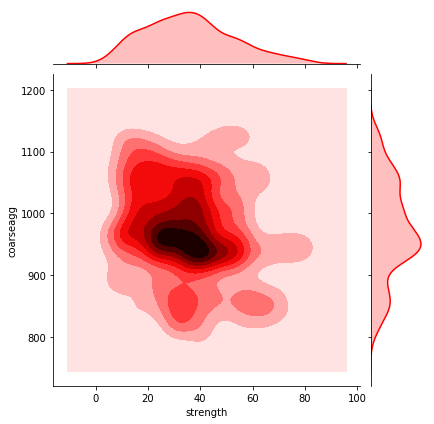

In [25]:
#coarseagg and strength distribution
plt.figure(figsize=(4,4))
sns.jointplot(concrete['strength'],concrete['coarseagg'],kind='kde',color='Red')

<Figure size 288x288 with 0 Axes>

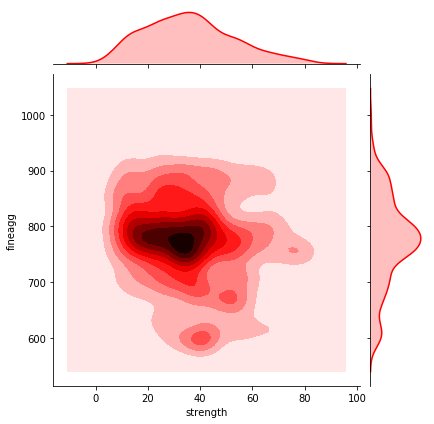

In [26]:
#fineagg and strength distribution
plt.figure(figsize=(4,4))
sns.jointplot(concrete['strength'],concrete['fineagg'],kind='kde',color='Red')

<Figure size 288x288 with 0 Axes>

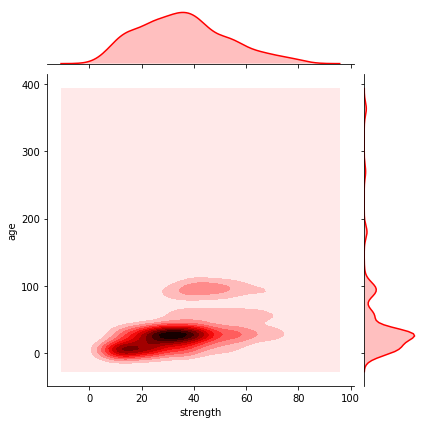

In [27]:
#age and strength distribution
plt.figure(figsize=(4,4))
sns.jointplot(concrete['strength'],concrete['age'],kind='kde',color='Red')

In [28]:
#We can see that most data for strength is concentrated around range 20-40

In [29]:
concrete.groupby(['strength_group']).agg(['median'])

cement   slag    ash  water superplastic coarseagg fineagg  \
               median median median median       median    median  median   
strength_group                                                              
1. Low          199.3    0.0    0.0  192.0          0.0     978.4   801.0   
2. Medium       236.0    0.0    0.0  185.7          3.6     998.0   784.0   
3. High         304.0   50.1    0.0  178.5          8.0     955.1   768.0   

                  age strength  
               median   median  
strength_group                  
1. Low              7   12.505  
2. Medium          28   23.520  
3. High            28   41.720

In [30]:
concrete.groupby(['age_group']).agg(['median'])

cement   slag    ash   water superplastic coarseagg fineagg  \
               median median median  median       median    median  median   
age_group                                                                    
1. 1-15 days   276.05   12.3    0.0  185.35         4.50    977.00  781.50   
2. 16-30 days  261.00   94.7   60.0  185.00         7.80    953.20  769.30   
3. 1-3 months  277.00   22.0    0.0  181.10         5.80    967.10  781.50   
4. 3 months+   288.35    0.0    0.0  188.50         4.55    971.95  780.35   

                 age strength  
              median   median  
age_group                      
1. 1-15 days       7   21.550  
2. 16-30 days     28   33.760  
3. 1-3 months     56   46.640  
4. 3 months+     100   47.335

In [31]:
concrete.groupby(['strength_group','age_group']).agg(['median'])

cement   slag     ash   water superplastic  \
                              median median  median  median       median   
strength_group age_group                                                   
1. Low         1. 1-15 days   216.35    0.0    0.00  192.00         0.00   
               2. 16-30 days  151.00    0.0  174.95  181.10        10.55   
2. Medium      1. 1-15 days   272.80    0.0   24.50  185.70         4.60   
               2. 16-30 days  181.40   42.1    0.00  185.70         3.40   
               3. 1-3 months  233.80    0.0    0.00  194.00         0.00   
               4. 3 months+   245.00    0.0    0.00  195.50         0.00   
3. High        1. 1-15 days   380.00   54.6    0.00  164.00        11.10   
               2. 16-30 days  297.90  103.0   12.25  182.25         8.00   
               3. 1-3 months  285.15   23.0    0.00  178.50         6.60   
               4. 3 months+   293.05    0.0    0.00  187.05         4.95   

                             coarseagg fineagg    age strength  
                                median  median median   median  
strength_group age_group                                        
1. Low         1. 1-15 days     992.90  800.10      3   12.275  
               2. 16-30 days    952.00  811.75     28   13.290  
2. Medium      1. 1-15 days    1003.50  779.30      7   22.530  
               2. 16-30 days   1000.00  784.30     28   23.890  
               3. 1-3 months    942.00  885.00     90   25.460  
               4. 3 months+     968.00  874.00    180   25.910  
3. High        1. 1-15 days     944.70  756.70      7   36.300  
               2. 16-30 days    942.35  757.70     28   39.650  
               3. 1-3 months    968.00  780.65     56   47.465  
               4. 3 months+     973.95  779.70    100   47.985

In [32]:
concrete.groupby(['strength_group','age_group']).agg(['count'])

cement  slag   ash water superplastic coarseagg  \
                              count count count count        count     count   
strength_group age_group                                                       
1. Low         1. 1-15 days     120   120   120   120          120       120   
               2. 16-30 days     28    28    28    28           28        28   
2. Medium      1. 1-15 days     103   103   103   103          103       103   
               2. 16-30 days     99    99    99    99           99        99   
               3. 1-3 months      7     7     7     7            7         7   
               4. 3 months+       4     4     4     4            4         4   
3. High        1. 1-15 days     101   101   101   101          101       101   
               2. 16-30 days    298   298   298   298          298       298   
               3. 1-3 months    138   138   138   138          138       138   
               4. 3 months+     132   132   132   132          132       132   

                             fineagg   age strength  
                               count count    count  
strength_group age_group                             
1. Low         1. 1-15 days      120   120      120  
               2. 16-30 days      28    28       28  
2. Medium      1. 1-15 days      103   103      103  
               2. 16-30 days      99    99       99  
               3. 1-3 months       7     7        7  
               4. 3 months+        4     4        4  
3. High        1. 1-15 days      101   101      101  
               2. 16-30 days     298   298      298  
               3. 1-3 months     138   138      138  
               4. 3 months+      132   132      132

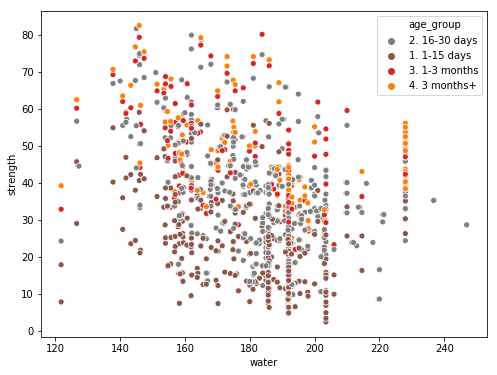

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(concrete['water'],concrete['strength'],hue=concrete['age_group'],palette='tab10_r')

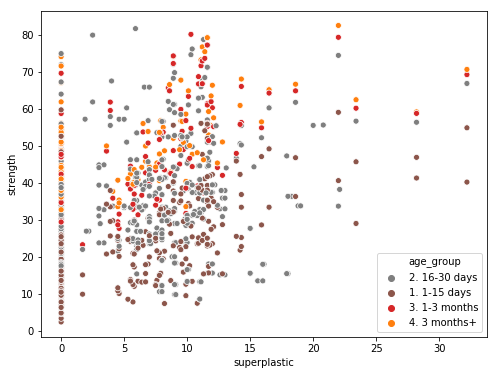

In [34]:
#superpalstic is taken in low amount and there strength increases as time goes by.
plt.figure(figsize=(8,6))
sns.scatterplot(concrete['superplastic'],concrete['strength'],hue=concrete['age_group'],palette='tab10_r')

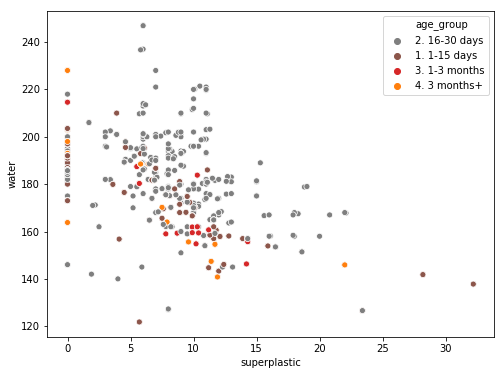

In [35]:
#superpalstic is taken in low amount and there strength increases as time goes by.
plt.figure(figsize=(8,6))
sns.scatterplot(concrete['superplastic'],concrete['water'],hue=concrete['age_group'],palette='tab10_r')

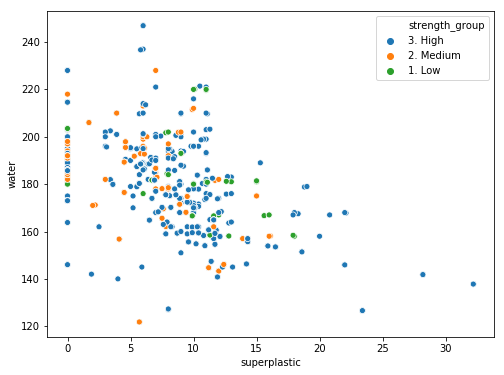

In [36]:
#superpalstic is taken in low amount and there strength increases as time goes by.
plt.figure(figsize=(8,6))
sns.scatterplot(concrete['superplastic'],concrete['water'],hue=concrete['strength_group'])

In [37]:
#replacing zeros with NaN's
concrete.replace(0,np.nan,inplace=True)
#checking for zeros now
print("Zeros now in data")
print(concrete[concrete==0].count(axis=0))
#checking missing now, need to look at them. First lets study features.
print("\nNow missing values in data")
print(concrete.isnull().sum())

Zeros now in data
cement            0
slag              0
ash               0
water             0
superplastic      0
coarseagg         0
fineagg           0
age               0
strength          0
age_group         0
strength_group    0
dtype: int64

Now missing values in data
cement              0
slag              471
ash               566
water               0
superplastic      379
coarseagg           0
fineagg             0
age                 0
strength            0
age_group           0
strength_group      0
dtype: int64


In [38]:
#Filling NA as per group created for age and strength

In [39]:
con_col=['slag','ash','superplastic']

for item in con_col:
    concrete[item].fillna(concrete.groupby(['strength_group','age_group'])[item].transform('median'),inplace=True)

In [40]:
#checking of blanks
concrete.isnull().sum()

cement            0
slag              4
ash               4
water             0
superplastic      4
coarseagg         0
fineagg           0
age               0
strength          0
age_group         0
strength_group    0
dtype: int64

In [41]:
concrete.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1026.000000  1026.000000  1030.000000   1026.000000   
mean    281.167864   135.291033   119.559747   181.567282      9.353509   
std     104.506364    54.548801    22.886700    21.354219      3.791556   
min     102.000000    11.000000    24.500000   121.800000      1.700000   
25%     192.375000   114.000000   113.000000   164.900000      7.100000   
50%     272.900000   139.950000   121.400000   185.000000      9.000000   
75%     350.000000   155.500000   123.050000   192.000000     10.475000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [42]:
#Filllinh of remaining blanks in data
con_col=['slag','ash','superplastic']

for item in con_col:
    concrete[item].fillna(concrete[item].median(),inplace=True)

In [43]:
#Finally checking of blanks
concrete.isnull().sum()

cement            0
slag              0
ash               0
water             0
superplastic      0
coarseagg         0
fineagg           0
age               0
strength          0
age_group         0
strength_group    0
dtype: int64

In [44]:
concrete.columns
concrete.drop(['strength_group','age_group'],inplace=True,axis=1)
concrete.shape

(1030, 9)

In [45]:
#considering concerete as final data, now starting with analysis.
#Doing test train split

In [46]:
from sklearn.model_selection import train_test_split
concrete_train,concrete_test=train_test_split(concrete,train_size=0.7,random_state=100)

In [47]:
concrete_train.shape

(721, 9)

In [48]:
#Doing Scaling of the variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [49]:
#To train dataset
concrete_train_scl=scaler.fit_transform(concrete_train)

#To test Dataset
concrete_test_scl=scaler.transform(concrete_test)

In [50]:
concrete_train_scl=pd.DataFrame(concrete_train_scl,columns=concrete_train.columns)
concrete_test_scl=pd.DataFrame(concrete_test_scl,columns=concrete_test.columns)

In [51]:
#X Y split of train data
X_concrete_train=concrete_train_scl.drop(['strength'],axis=1)
Y_concrete_train=concrete_train_scl['strength']

#X Y split of test data
X_concrete_test=concrete_test_scl.drop(['strength'],axis=1)
Y_concrete_test=concrete_test_scl['strength']

In [52]:
# Linear Regression

In [53]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
#Add constant
X_concrete_train_1=sm.add_constant(X_concrete_train)

In [55]:
lm1=sm.OLS(Y_concrete_train,X_concrete_train_1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     133.2
Date:                Sun, 10 Nov 2019   Prob (F-statistic):          6.21e-136
Time:                        03:06:44   Log-Likelihood:                -693.29
No. Observations:                 721   AIC:                             1405.
Df Residuals:                     712   BIC:                             1446.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.466e-16      0.024   6.18e-15   

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_concrete_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_concrete_train_1.values, i) for i in range(X_concrete_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4         water  2.28
7       fineagg  1.78
5  superplastic  1.61
1        cement  1.47
6     coarseagg  1.36
2          slag  1.20
8           age  1.17
3           ash  1.09
0         const  1.00

In [57]:
#dropping coarseagg, there is no significant change.
X_concrete_train_2 = X_concrete_train.drop(['slag'],axis=1)

#ITERATION 6
lm2=sm.OLS(Y_concrete_train,X_concrete_train_2).fit()
print(lm2.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_concrete_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_concrete_train_2.values, i) for i in range(X_concrete_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:               strength   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.592
Method:                 Least Squares   F-statistic:                              150.7
Date:                Sun, 10 Nov 2019   Prob (F-statistic):                   4.51e-136
Time:                        03:06:49   Log-Likelihood:                         -696.02
No. Observations:                 721   AIC:                                      1406.
Df Residuals:                     714   BIC:                                      1438.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Features   VIF
2         water  2.24
5       fineagg  1.74
3  superplastic  1.58
4     coarseagg  1.36
0        cement  1.32
6           age  1.14
1           ash  1.09

In [58]:
#Trying RFE
# Import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 6 features
lm3 = LinearRegression()
rfe1 = RFE(lm3, 6)

# Fit with 6 features
rfe1.fit(X_concrete_train, Y_concrete_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[ True False  True  True False  True  True  True]
[1 3 1 1 2 1 1 1]


In [59]:
# Subset the features selected by rfe1
col1 = X_concrete_train.columns[rfe1.support_]

# Subsetting training data for 6 selected columns
X_train_rfe1 = X_concrete_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

const    cement       ash     water  coarseagg   fineagg       age
0    1.0  0.914899 -0.240901  0.190429   0.921345 -0.397459 -0.250373
1    1.0 -1.344969  0.674609 -0.041268   0.038937  0.491025 -0.250373
2    1.0 -1.268687 -0.009844  0.839180   0.337398 -1.066864 -0.250373
3    1.0 -1.211475  1.851693  0.885520  -1.660995 -1.249429 -0.250373
4    1.0 -1.070353  1.803738 -0.444421   0.404877 -0.304959 -0.477359

In [60]:
# Fitting the model with 6 variables
lm4 = sm.OLS(Y_concrete_train, X_train_rfe1).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     173.4
Date:                Sun, 10 Nov 2019   Prob (F-statistic):          9.28e-136
Time:                        03:07:00   Log-Likelihood:                -698.95
No. Observations:                 721   AIC:                             1412.
Df Residuals:                     714   BIC:                             1444.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.466e-16      0.024   6.14e-15      1.0

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5    fineagg  1.70
3      water  1.67
1     cement  1.28
4  coarseagg  1.21
6        age  1.11
2        ash  1.09
0      const  1.00

In [62]:
#Selecting first linear regression algo and doing residual analysis

Text(0.5, 0, 'Errors')

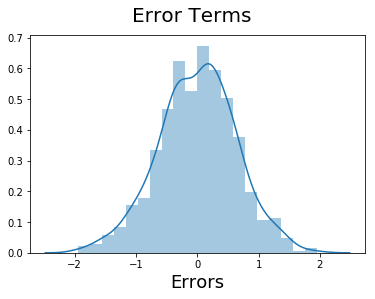

In [63]:
#Error term is normally distributed
Y_concrete_train_predict = lm1.predict(X_concrete_train_1)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_concrete_train - Y_concrete_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [64]:
#Making Predictions
# Add a constant to the test set created
X_test = sm.add_constant(X_concrete_test)
X_test.info()

# Making predictions
y_pred = lm1.predict(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 9 columns):
const           309 non-null float64
cement          309 non-null float64
slag            309 non-null float64
ash             309 non-null float64
water           309 non-null float64
superplastic    309 non-null float64
coarseagg       309 non-null float64
fineagg         309 non-null float64
age             309 non-null float64
dtypes: float64(9)
memory usage: 21.8 KB


Text(0, 0.5, 'y_pred')

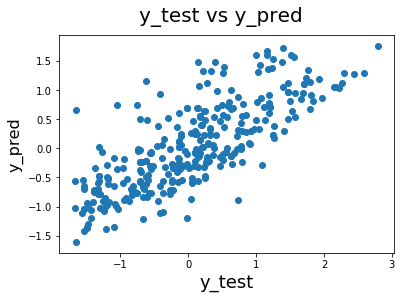

In [65]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(Y_concrete_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [66]:
# r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R-square: ",r2_score(Y_concrete_test, y_pred))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_pred)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_pred))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_pred))

R-square:  0.5968896680148348
Root Mean square error:  0.6156854282397454
Mean square error:  0.37906854654675864
Mean absolute error:  0.4925910339047266


Text(0, 0.5, 'Values')

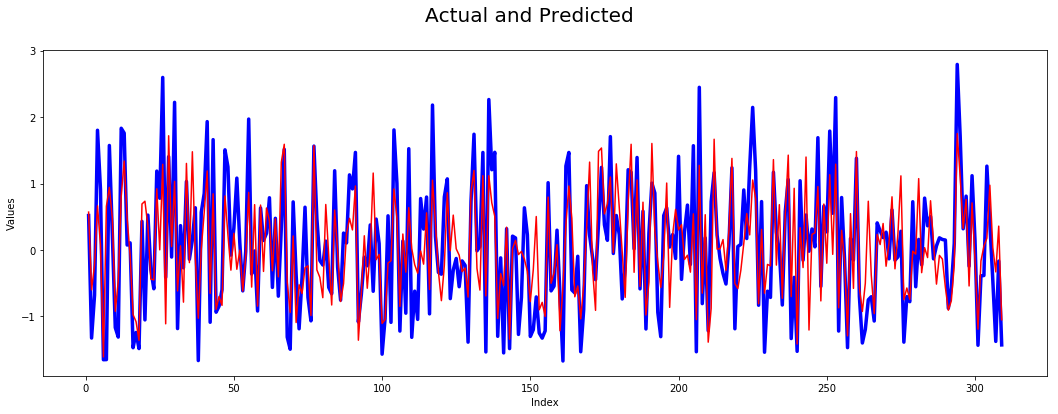

In [67]:
#Actual vs Predicted
c = [i for i in range(1,310,1)]
fig = plt.figure(figsize=(18,6))
plt.plot(c,Y_concrete_test, color="blue", linewidth=3.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

In [68]:
#model traverses through output well, however is not able to predict abrupt highs and lows.

In [69]:
#Ridge Regression

In [70]:
from sklearn.linear_model import Ridge

R2 score :  0.5969744015764695
Root Mean square error:  0.615620716476222
Mean square error:  0.3789888665546968
Mean absolute error:  0.4925719777729024


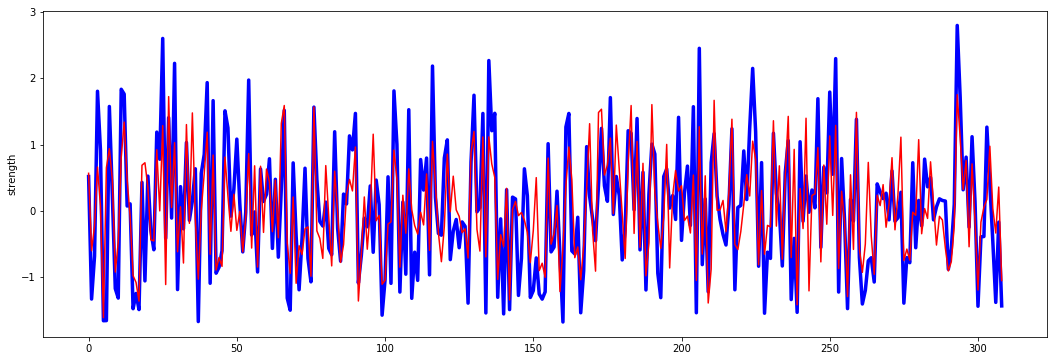

In [71]:
#define model
Ridge_model_1=Ridge()
#training model
Ridge_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_Ridge_pred_1 = Ridge_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_Ridge_pred_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_Ridge_pred_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_Ridge_pred_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_Ridge_pred_1))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_Ridge_pred_1,c='r',linewidth=1.5)

R2 score :  0.5968905848107495
Root Mean square error:  0.615684728111069
Mean square error:  0.379067684429201
Mean absolute error:  0.4925908407843723


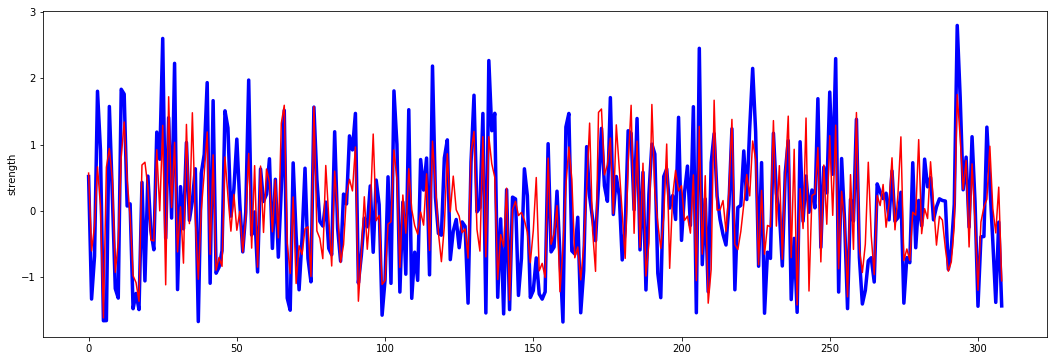

In [72]:
#define model
Ridge_model_1=Ridge(alpha=0.01)
#training model
Ridge_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_Ridge_pred_1 = Ridge_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_Ridge_pred_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_Ridge_pred_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_Ridge_pred_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_Ridge_pred_1))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_Ridge_pred_1,c='r',linewidth=1.5)

In [73]:
#Lasso Regression

In [74]:
from sklearn.linear_model import Lasso

R2 score :  0.5969190590376675
Root Mean square error:  0.6156629828285314
Mean square error:  0.37904090842532456
Mean absolute error:  0.492636312844475


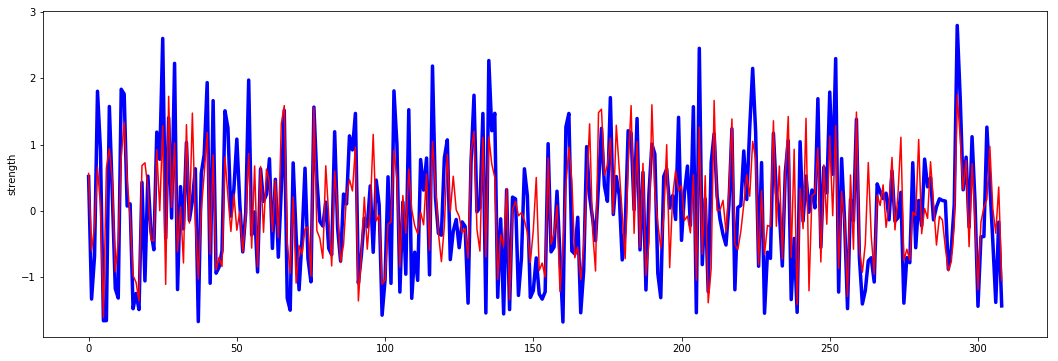

In [75]:
#define model
Lasso_model_1=Lasso(alpha=0.001, max_iter=1000)
#training model
Lasso_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_Lasso_pred_1 = Lasso_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_Lasso_pred_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_Lasso_pred_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_Lasso_pred_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_Lasso_pred_1))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_Lasso_pred_1,c='r',linewidth=1.5)

In [76]:
#Polynomial Regression

R-square:  0.7810552904175327
Root Mean square error:  0.45374738806830733
Mean square error:  0.2058866921788111
Mean absolute error:  0.3558749764807242


Text(0, 0.5, 'Values')

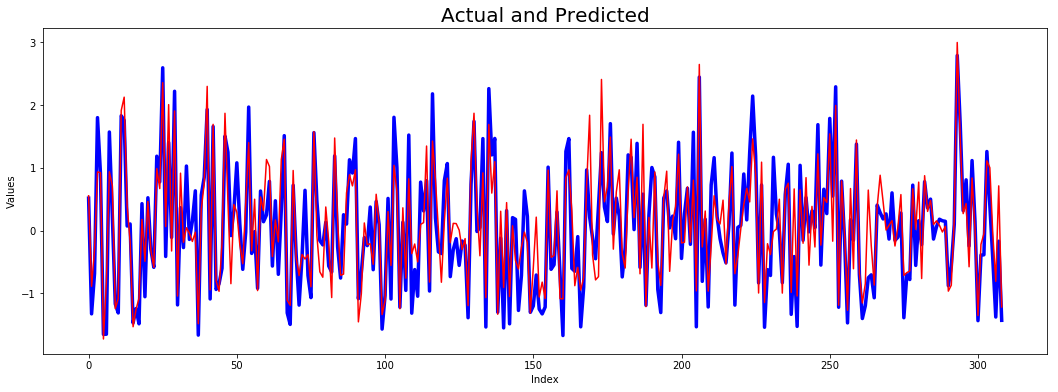

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('poly',PolynomialFeatures(degree=2)),('lr', LinearRegression())])
pipeline.fit(X_concrete_train, Y_concrete_train)
y_poly_pred = pipeline.predict(X_concrete_test)

print("R-square: ",r2_score(Y_concrete_test, y_poly_pred))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_poly_pred)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_poly_pred))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_poly_pred))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_poly_pred,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

In [78]:
#Support Vector Regressor

In [79]:
from sklearn.svm import SVR

R2 score :  0.8395061675091201
Root Mean square error:  0.3884866365224265
Mean square error:  0.15092186675650793
Mean absolute error:  0.29005745139183137


Text(0, 0.5, 'Values')

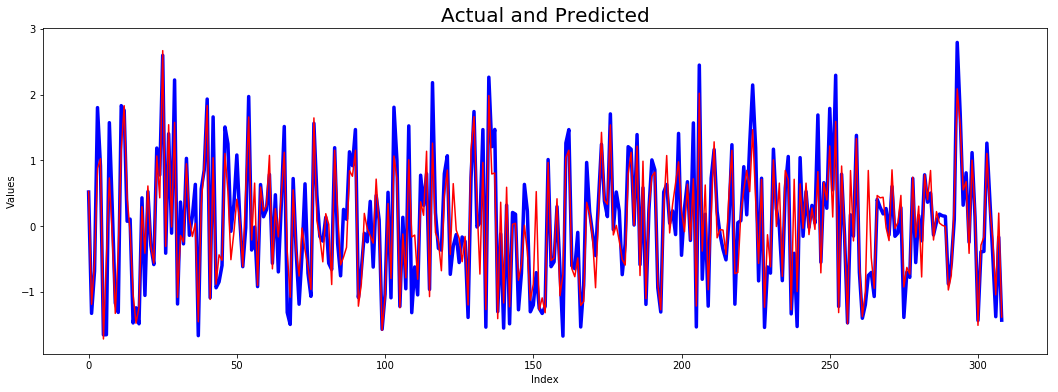

In [80]:
#model define
SVR_model_1 = SVR(kernel='rbf')
#training model
SVR_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_SVR_pred = SVR_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_SVR_pred))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_SVR_pred)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_SVR_pred))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_SVR_pred))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_SVR_pred,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label


R2 score :  0.8329063042242548
Root Mean square error:  0.3963938817956633
Mean square error:  0.1571281095250343
Mean absolute error:  0.3031258795011912


Text(0, 0.5, 'Values')

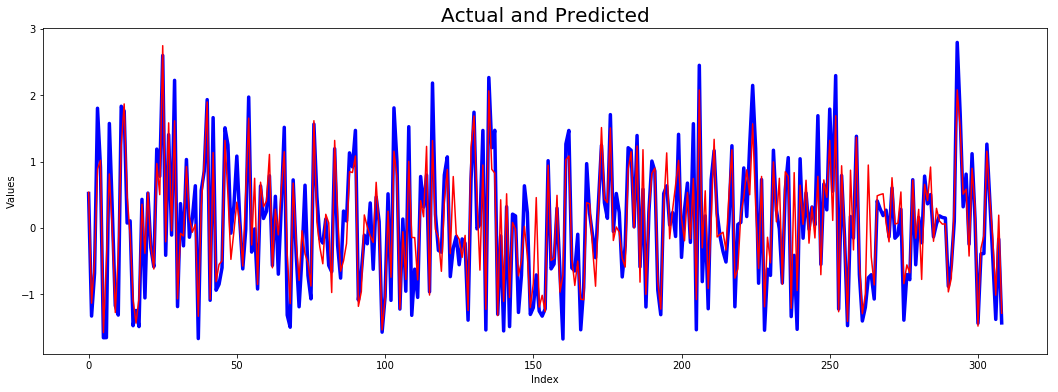

In [81]:
#model define
SVR_model_2 = SVR(gamma='scale',C=1.0, epsilon=0.2,kernel='rbf')
#training model
SVR_model_2.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_SVR_pred_2 = SVR_model_2.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_SVR_pred_2))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_SVR_pred_2)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_SVR_pred_2))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_SVR_pred_2))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_SVR_pred_2,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

In [82]:
#KNN Regressor

In [83]:
from sklearn.neighbors import KNeighborsRegressor

R2 score :  0.6745790827017074
Root Mean square error:  0.5531840412778047
Mean square error:  0.306012583524444
Mean absolute error:  0.42939379860023774


Text(0, 0.5, 'Values')

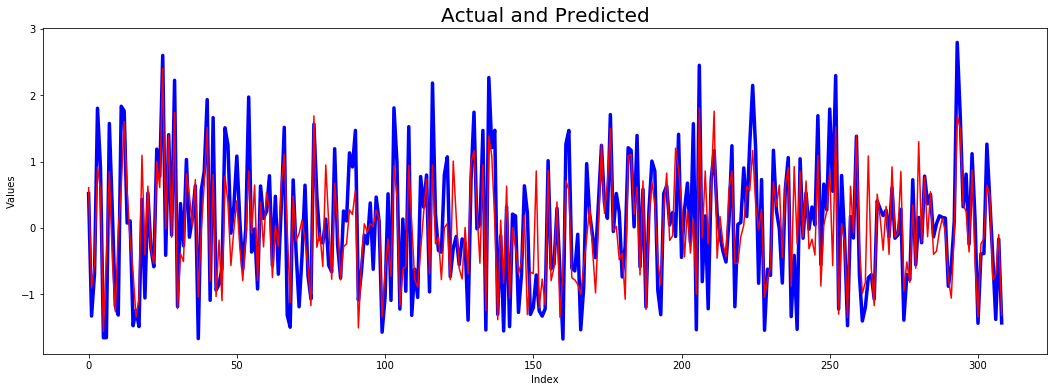

In [84]:
#define model
KNNR_model_1=KNeighborsRegressor()
#training model
KNNR_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_KNNR_pred_1 = KNNR_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_KNNR_pred_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_KNNR_pred_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_KNNR_pred_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_KNNR_pred_1))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_KNNR_pred_1,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

R2 score :  0.7612171141237233
Root Mean square error:  0.4738583180667672
Mean square error:  0.22454170560106554
Mean absolute error:  0.350744274934796


Text(0, 0.5, 'Values')

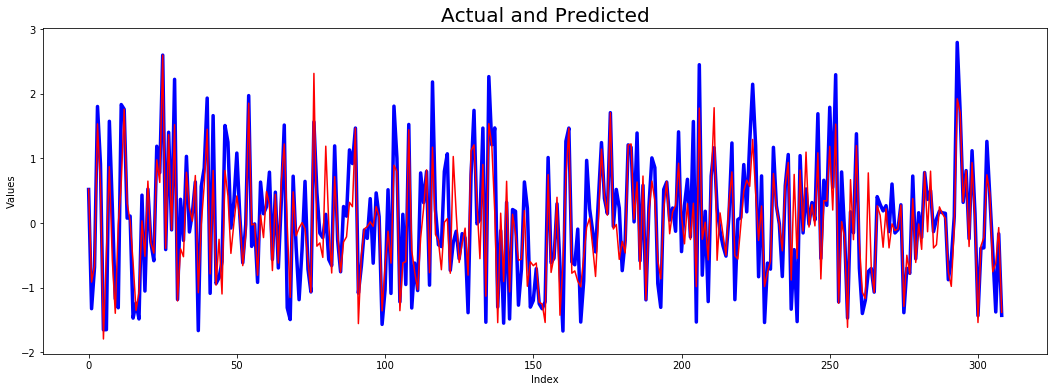

In [85]:
#define model
KNNR_model_2=KNeighborsRegressor(n_neighbors=5,weights='distance')
#training model
KNNR_model_2.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_KNNR_pred_2 = KNNR_model_2.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_KNNR_pred_2))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_KNNR_pred_2)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_KNNR_pred_2))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_KNNR_pred_2))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_KNNR_pred_2,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

In [86]:
#Decision Tree

In [87]:
from sklearn.tree import DecisionTreeRegressor

R2 score :  0.7386054777146465
Root Mean square error:  0.495787018804271
Mean square error:  0.2458047680148266
Mean absolute error:  0.3110837287366103


Imp
age           0.288928
cement        0.282022
water         0.158419
superplastic  0.109754
slag          0.072550
fineagg       0.036153
coarseagg     0.034513
ash           0.017660

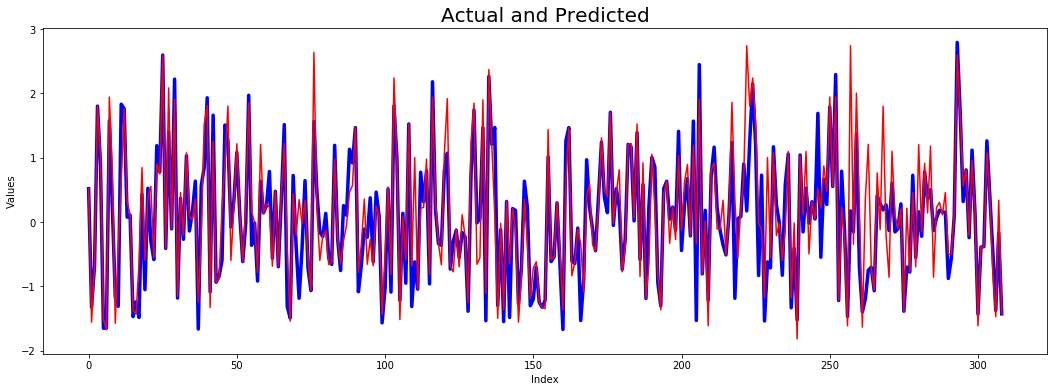

In [88]:
#define model
DT_model_1=DecisionTreeRegressor()
#training model
DT_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_DT_pred_1 = DT_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_DT_pred_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_DT_pred_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_DT_pred_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_DT_pred_1))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_DT_pred_1,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
dt_imp_feature_1=pd.DataFrame(DT_model_1.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_1.sort_values(by="Imp",ascending=False)

R2 score :  0.7566012512388016
Root Mean square error:  0.4784164244226671
Mean square error:  0.2288822751573695
Mean absolute error:  0.3425262323528224


Imp
age           0.305413
cement        0.287431
water         0.173307
superplastic  0.114738
slag          0.042686
coarseagg     0.028828
fineagg       0.028130
ash           0.019466

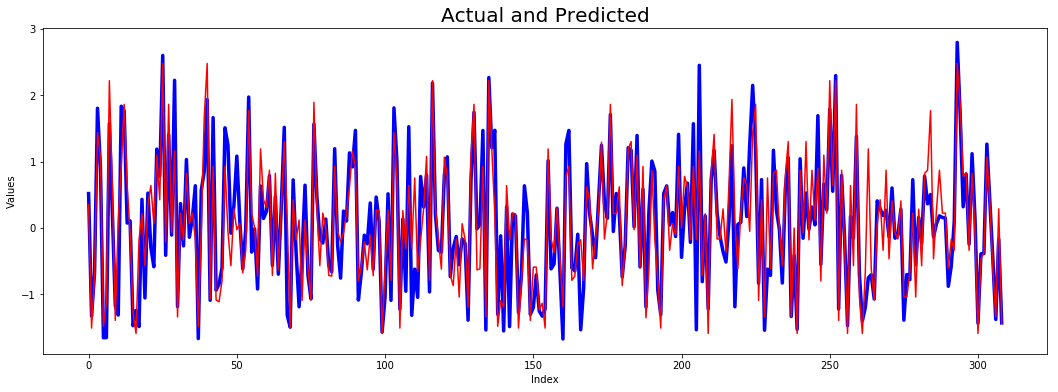

In [89]:
#define model
DT_model_2=DecisionTreeRegressor(max_depth=10,min_samples_leaf=5)
#training model
DT_model_2.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_DT_pred_2 = DT_model_2.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_DT_pred_2))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_DT_pred_2)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_DT_pred_2))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_DT_pred_2))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_DT_pred_2,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
dt_imp_feature_2=pd.DataFrame(DT_model_2.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_2.sort_values(by="Imp",ascending=False)

In [90]:
#Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor

R2 score :  0.8513016521391339
Root Mean square error:  0.37393832803853205
Mean square error:  0.1398298731762528
Mean absolute error:  0.266735880568355


Imp
age           0.306505
cement        0.271101
water         0.156473
superplastic  0.096701
slag          0.058931
fineagg       0.049435
ash           0.033257
coarseagg     0.027597

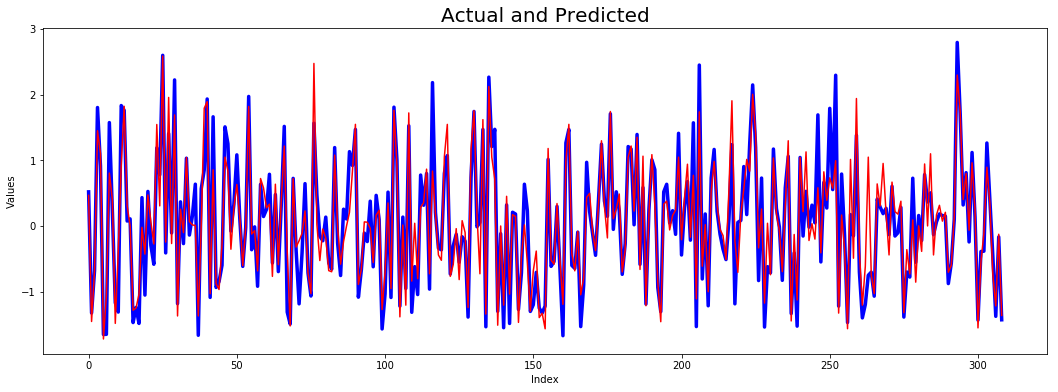

In [92]:
#define model
RF_model_1=RandomForestRegressor()
#training model
RF_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_RF_pred_1 = RF_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_RF_pred_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_RF_pred_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_RF_pred_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_RF_pred_1))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_RF_pred_1,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
dt_imp_feature_1=pd.DataFrame(RF_model_1.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_1.sort_values(by="Imp",ascending=False)

R2 score :  0.8070333308090484
Root Mean square error:  0.4259788733002778
Mean square error:  0.1814580004981741
Mean absolute error:  0.32069682299069235


Imp
age           0.335490
cement        0.285612
water         0.152417
superplastic  0.112423
fineagg       0.034879
slag          0.034370
ash           0.029940
coarseagg     0.014869

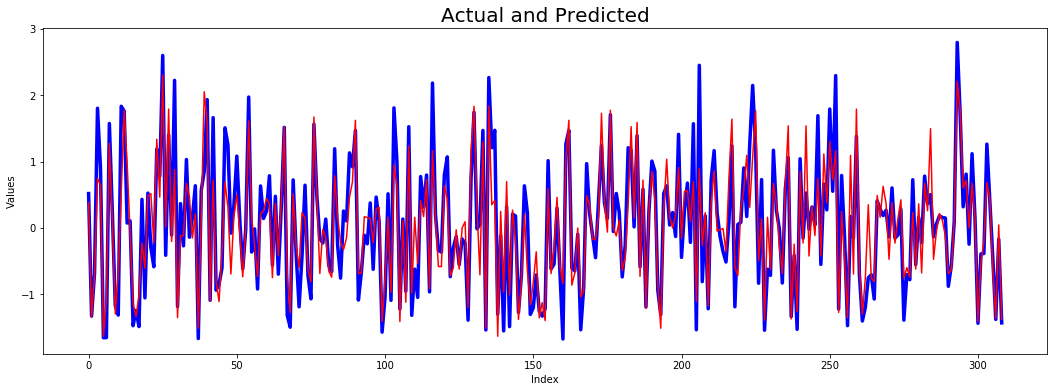

In [93]:
#define model
RF_model_2=RandomForestRegressor(n_estimators=20,max_depth=10,min_samples_leaf=8)
#training model
RF_model_2.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_RF_pred_2 = RF_model_2.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_RF_pred_2))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_RF_pred_2)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_RF_pred_2))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_RF_pred_2))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_RF_pred_2,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
dt_imp_feature_2=pd.DataFrame(RF_model_2.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_2.sort_values(by="Imp",ascending=False)


In [94]:
#Gradient Boost Regressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

R2 score :  0.8781696434487704
Root Mean square error:  0.33847349656948994
Mean square error:  0.11456430787997653
Mean absolute error:  0.25210650566683884


Imp
age           0.335573
cement        0.273426
water         0.160862
superplastic  0.075093
slag          0.054038
fineagg       0.044551
ash           0.036127
coarseagg     0.020330

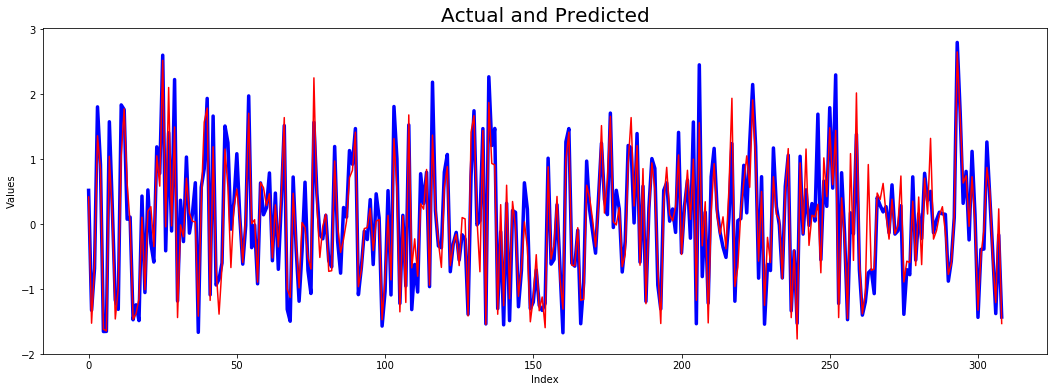

In [96]:
#define model
GB_model_1=GradientBoostingRegressor()
#training model
GB_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_GB_pred_1 = GB_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_GB_pred_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_GB_pred_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_GB_pred_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_GB_pred_1))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_GB_pred_1,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
dt_imp_feature_1=pd.DataFrame(GB_model_1.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_1.sort_values(by="Imp",ascending=False)


R2 score :  0.9134964923214408
Root Mean square error:  0.28520935691377625
Mean square error:  0.08134437727116982
Mean absolute error:  0.18847332211663093


Imp
age           0.314037
cement        0.267501
water         0.159457
superplastic  0.092455
slag          0.064525
fineagg       0.047830
ash           0.031106
coarseagg     0.023088

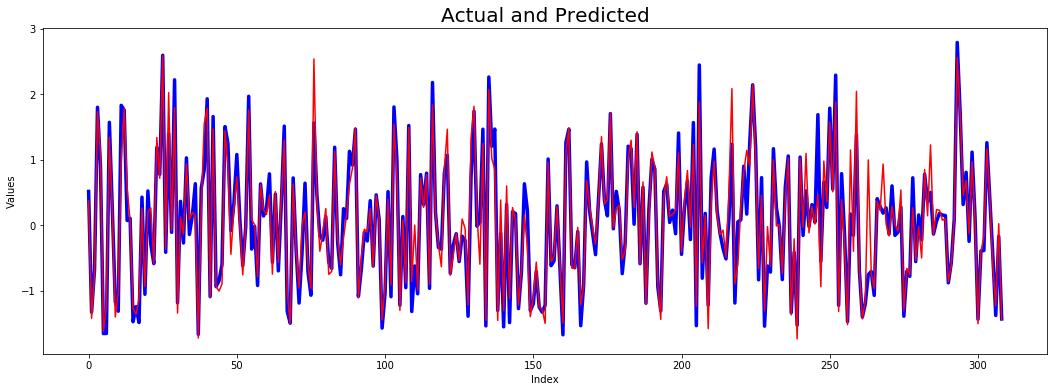

In [97]:
#define model
GB_model_2=GradientBoostingRegressor(n_estimators=150,max_depth=5)
#training model
GB_model_2.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_GB_pred_2 = GB_model_2.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_GB_pred_2))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_GB_pred_2)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_GB_pred_2))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_GB_pred_2))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_GB_pred_2,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
dt_imp_feature_1=pd.DataFrame(GB_model_2.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_1.sort_values(by="Imp",ascending=False)


In [98]:
from xgboost.sklearn import XGBRegressor

R2 score :  0.8791330832851355
Root Mean square error:  0.3371325084846866
Mean square error:  0.11365832827717728
Mean absolute error:  0.253839534412735


Imp
age           0.326583
cement        0.229011
water         0.159892
superplastic  0.085120
slag          0.066067
ash           0.059301
fineagg       0.050412
coarseagg     0.023613

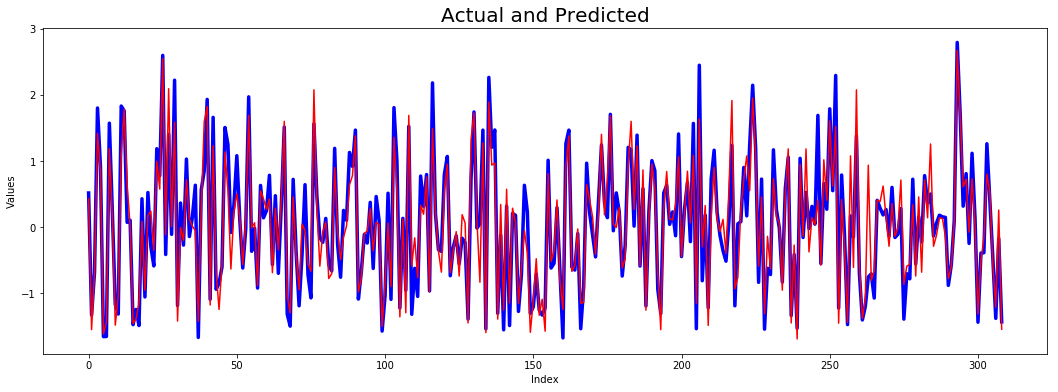

In [99]:
#define model
XGB_model_1=XGBRegressor(objective='reg:squarederror')
#training model
XGB_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_XGB_pred_1 = XGB_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_XGB_pred_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_XGB_pred_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_XGB_pred_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_XGB_pred_1))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_XGB_pred_1,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
dt_imp_feature_1=pd.DataFrame(XGB_model_1.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_1.sort_values(by="Imp",ascending=False)

[03:08:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score :  0.9121176661185139
Root Mean square error:  0.2874734236476545
Mean square error:  0.08264096930370385
Mean absolute error:  0.190902349148119


Imp
age           0.295350
cement        0.195068
water         0.167938
superplastic  0.128142
ash           0.064774
fineagg       0.064144
slag          0.056094
coarseagg     0.028490

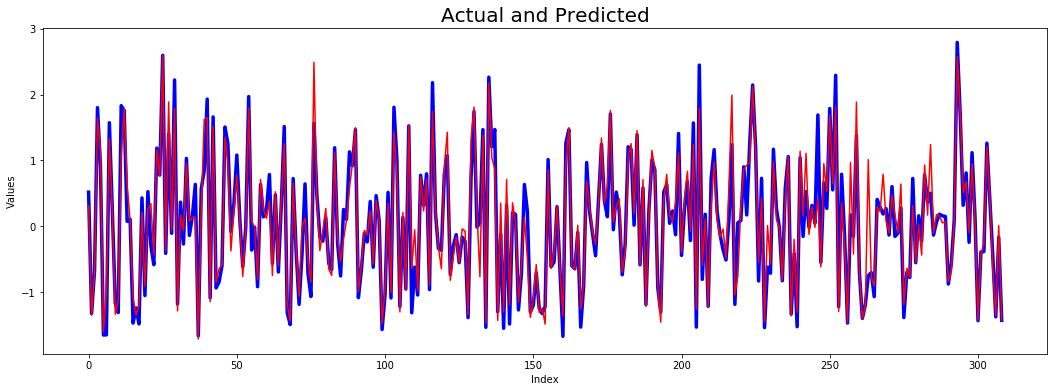

In [100]:
#define model
XGB_model_2=XGBRegressor(n_estimators=150,max_depth=5)
#training model
XGB_model_2.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_XGB_pred_2 = XGB_model_2.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_XGB_pred_2))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_XGB_pred_2)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_XGB_pred_2))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_XGB_pred_2))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_XGB_pred_2,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
dt_imp_feature_2=pd.DataFrame(XGB_model_2.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_2.sort_values(by="Imp",ascending=False)

In [101]:
#dropping coarseagg and slag as both had very low importance in ensemble technique
#X_concrete_train_3 = X_concrete_train.drop(['coarseagg','slag'],axis=1)
#X_concrete_test_3 = X_concrete_test.drop(['coarseagg','slag'],axis=1)
#print(X_concrete_train_3.shape)
#print(X_concrete_test_3.shape)

In [102]:
#Doing Hyperparameter tuning to Random Forest, Gradient Boost and XGBoost

In [103]:
#Tunning of Random Forest

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

skf = KFold(n_splits=5, random_state=1)

In [105]:
RF_model_3 = RandomForestRegressor()

params = {"n_estimators": np.arange(10,16,2),"max_depth": np.arange(5, 9,1),
          "max_features":np.arange(5,8,1),'min_samples_leaf': range(4, 12, 2),
    'min_samples_split': range(20, 26, 2)}

RF_GV_1 = GridSearchCV(estimator = RF_model_3, param_grid = params,cv=skf,verbose=1,return_train_score=True)

RF_GV_1.fit(X_concrete_train,Y_concrete_train) 


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:  1.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([10, 12, 14]), 'max_depth': array([5, 6, 7, 8]), 'max_features': array([5, 6, 7]), 'min_samples_leaf': range(4, 12, 2), 'min_samples_split': range(20, 26, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [106]:
# results of grid search CV
RF_results = pd.DataFrame(RF_GV_1.cv_results_)


#parameters best value
best_score_rf = RF_GV_1.best_score_
best_rf = RF_GV_1.best_params_
best_rf

{'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'n_estimators': 12}

R2 score :  0.8135804537178126
Root Mean square error:  0.418690043627024
Mean square error:  0.17530135263239927
Mean absolute error:  0.30859520892988224


Imp
age           0.335462
cement        0.283864
water         0.141050
superplastic  0.120404
slag          0.057944
fineagg       0.029336
ash           0.021852
coarseagg     0.010088

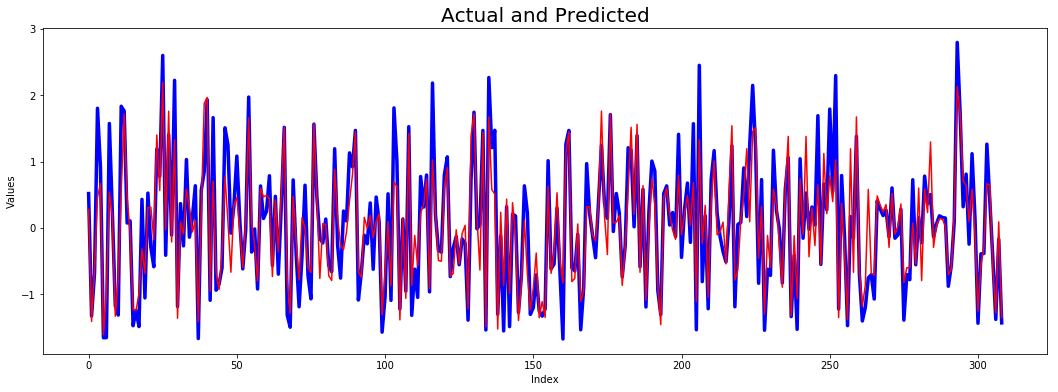

In [107]:
rf_best = RandomForestRegressor(max_depth= 8, max_features= 6,n_estimators=12,min_samples_leaf=8,min_samples_split=20)

rf_best.fit(X_concrete_train, Y_concrete_train)
# predict
y_pred_rf_1 = rf_best.predict(X_concrete_test)

#Results
print("R2 score : " , r2_score(Y_concrete_test,y_pred_rf_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_pred_rf_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_pred_rf_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_pred_rf_1))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_pred_rf_1,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
dt_imp_feature_2=pd.DataFrame(rf_best.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_2.sort_values(by="Imp",ascending=False)

In [108]:
#Tuning of Gradient Boosting

In [109]:
GB_model_3=GradientBoostingRegressor()
params = {"n_estimators": [130,140,2],"learning_rate":[0.09,0.1],"max_depth": np.arange(8, 14,2),
          "max_features":np.arange(3,8,1),'min_samples_leaf': range(14, 20, 2)}
GB_GV_1 = GridSearchCV(estimator = GB_model_3, param_grid = params,cv=skf,verbose=1,return_train_score=True)
GB_GV_1.fit(X_concrete_train,Y_concrete_train) 

# results of grid search CV
GB_results = pd.DataFrame(GB_GV_1.cv_results_)
#parameters best value
best_score_rf = GB_GV_1.best_score_
best_gb = GB_GV_1.best_params_
best_gb

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:  2.3min finished


{'learning_rate': 0.1,
 'max_depth': 12,
 'max_features': 4,
 'min_samples_leaf': 14,
 'n_estimators': 140}

R2 score :  0.9189428388594005
Root Mean square error:  0.27608486864466336
Mean square error:  0.07622285469454103
Mean absolute error:  0.18863355748094435


Imp
age           0.300884
cement        0.279387
water         0.129224
superplastic  0.108486
slag          0.074042
fineagg       0.045140
ash           0.032847
coarseagg     0.029990

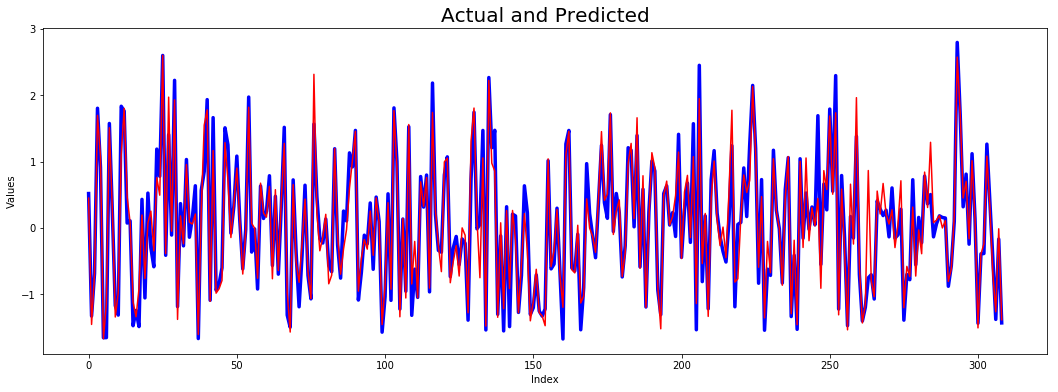

In [110]:
gb_best = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 140,max_depth= 10, 
                                           max_features= 5,min_samples_leaf=12)

gb_best.fit(X_concrete_train, Y_concrete_train)
# predict
y_pred_gb_1 = gb_best.predict(X_concrete_test)

#Results
print("R2 score : " , r2_score(Y_concrete_test,y_pred_gb_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_pred_gb_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_pred_gb_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_pred_gb_1))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_pred_gb_1,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
dt_imp_feature_2=pd.DataFrame(gb_best.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_2.sort_values(by="Imp",ascending=False)

In [111]:
#Tuning of XGBoost

In [112]:
#Regularization using GridSearchCV - 1st Iteration
XGB_model_3=XGBRegressor(objective='reg:squarederror')
params1 = {
    "colsample_bytree": [i/100.0 for i in range(48,54,1)],
    "learning_rate": [0.2,0.22,0.24], 
    "n_estimators": [174,184,2],
    "subsample": [i/100.0 for i in range(74,78,1)]
}
XGB_GV_3 = GridSearchCV(estimator = XGB_model_3, param_grid = params1, 
                        cv=skf,
                        verbose = 1,
                       return_train_score=True) 
XGB_GV_3.fit(X_concrete_train,Y_concrete_train) 

# results of grid search CV
XGB_results_3 = pd.DataFrame(XGB_GV_3.cv_results_)
#parameters best value
best_score_xgb_3 = XGB_GV_3.best_score_
best_xgb_3 = XGB_GV_3.best_params_
best_xgb_3

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  1.9min finished


{'colsample_bytree': 0.5,
 'learning_rate': 0.22,
 'n_estimators': 184,
 'subsample': 0.75}

R2 score :  0.9090186577184037
Root Mean square error:  0.29249812076317505
Mean square error:  0.08555515064998892
Mean absolute error:  0.1995995891483471


Imp
age           0.266391
superplastic  0.248805
cement        0.153008
slag          0.100030
water         0.074072
coarseagg     0.053891
fineagg       0.052723
ash           0.051080

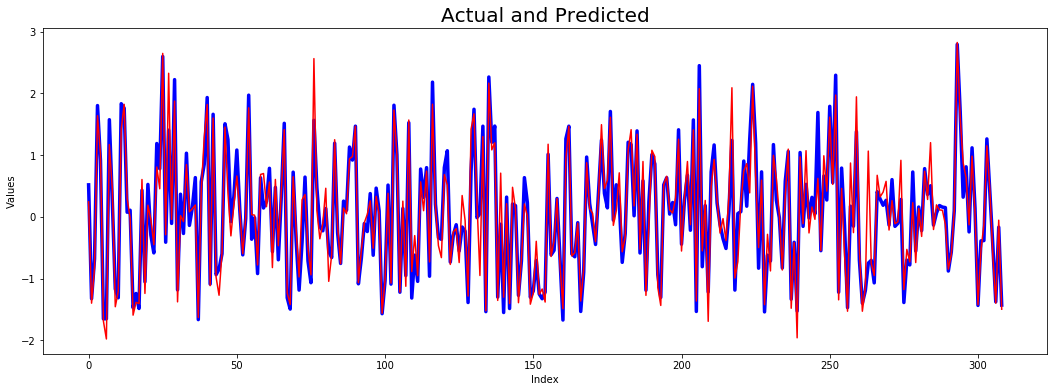

In [113]:
#Choosing best parameter from 1st Iteration
xgb_best_3 = XGBRegressor(colsample_bytree=0.5,learning_rate=0.22,n_estimators=180,subsample=0.75,objective='reg:squarederror')
xgb_best_3.fit(X_concrete_train, Y_concrete_train)
# predict
y_pred_xgb_3 = xgb_best_3.predict(X_concrete_test)

#Results
print("R2 score : " , r2_score(Y_concrete_test,y_pred_xgb_3))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_pred_xgb_3)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_pred_xgb_3))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_pred_xgb_3))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_pred_xgb_3,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
xgb_imp_feature_3=pd.DataFrame(xgb_best_3.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
xgb_imp_feature_3.sort_values(by="Imp",ascending=False)

In [114]:
#Regularization using GridSearchCV - 2nd Iteration

params2 = {
    'min_child_weight':[4,5,6,7],"max_depth": [2,4,6],
}

xgb_best_4 = GridSearchCV(estimator = xgb_best_3, param_grid = params2, 
                        cv=skf,
                        verbose = 1,
                       return_train_score=True) 

xgb_best_4.fit(X_concrete_train, Y_concrete_train) 

# results of grid search CV
XGB_results_4 = pd.DataFrame(xgb_best_4.cv_results_)
XGB_results_4

#parameters best value
best_score_xgb_4 = xgb_best_4.best_score_
best_xgb_4 = xgb_best_4.best_params_
best_xgb_4

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   10.1s finished


{'max_depth': 4, 'min_child_weight': 5}

R2 score :  0.9073978203488401
Root Mean square error:  0.29509205365772817
Mean square error:  0.0870793201319355
Mean absolute error:  0.19186417691983418


Imp
age           0.261302
superplastic  0.227749
slag          0.133808
cement        0.132467
water         0.077176
coarseagg     0.058313
ash           0.057021
fineagg       0.052164

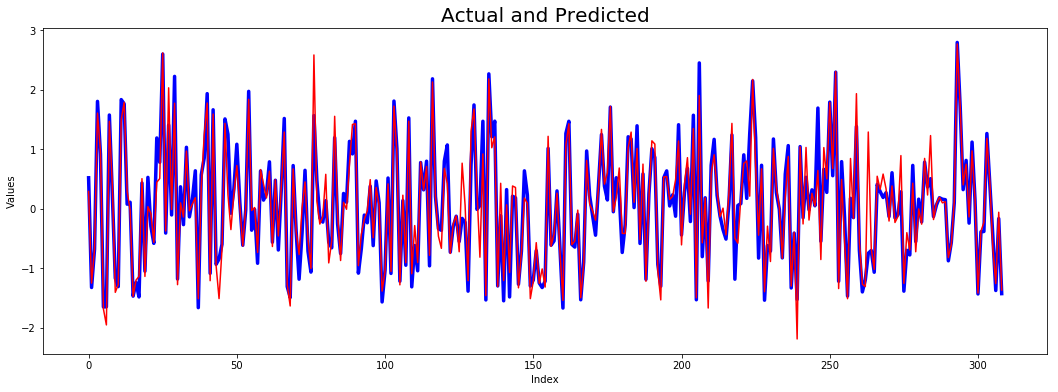

In [115]:
#Choosing best parameter from 2nd Iteration
xgb_best_4 = XGBRegressor(colsample_bytree=0.5,learning_rate=0.22,n_estimators=180,subsample=0.75,objective='reg:squarederror',
                         min_child_weight=5,max_depth=4)
xgb_best_4.fit(X_concrete_train, Y_concrete_train)
# predict
y_pred_xgb_4 = xgb_best_4.predict(X_concrete_test)

#Results
print("R2 score : " , r2_score(Y_concrete_test,y_pred_xgb_4))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_pred_xgb_4)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_pred_xgb_4))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_pred_xgb_4))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_pred_xgb_4,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
xgb_imp_feature_4=pd.DataFrame(xgb_best_4.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
xgb_imp_feature_4.sort_values(by="Imp",ascending=False)

In [116]:
#Regularization using GridSearchCV - 3rd Iteration

params3 = {
    'gamma':[i/1000.0 for i in range(1,20,2)]
}

xgb_best_5 = GridSearchCV(estimator = xgb_best_4, param_grid = params3, 
                        cv=skf,
                        verbose = 1,
                       return_train_score=True) 

xgb_best_5.fit(X_concrete_train, Y_concrete_train) 

# results of grid search CV
XGB_results_5 = pd.DataFrame(xgb_best_5.cv_results_)
XGB_results_5

#parameters best value
best_score_xgb_5 = xgb_best_5.best_score_
best_xgb_5 = xgb_best_5.best_params_
best_xgb_5

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.6s finished


{'gamma': 0.005}

R2 score :  0.9076981450908834
Root Mean square error:  0.29461314799244104
Mean square error:  0.08679690697001595
Mean absolute error:  0.19278622796834108


Imp
age           0.268719
superplastic  0.229464
slag          0.135646
cement        0.132162
water         0.074666
coarseagg     0.057101
ash           0.053737
fineagg       0.048505

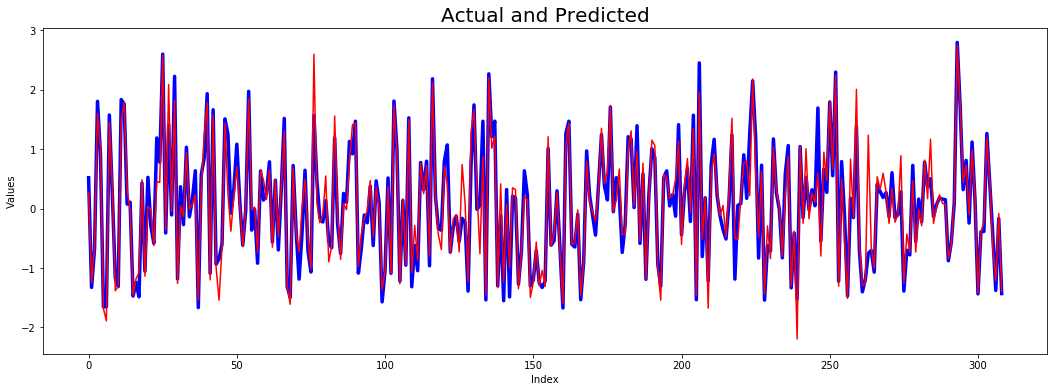

In [117]:
#Choosing best parameter from 3rd Iteration
xgb_best_5 = XGBRegressor(colsample_bytree=0.5,learning_rate=0.22,n_estimators=180,subsample=0.75,objective='reg:squarederror',
                         min_child_weight=5,max_depth=4,gamma=0.001)
xgb_best_5.fit(X_concrete_train, Y_concrete_train)
# predict
y_pred_xgb_5 = xgb_best_5.predict(X_concrete_test)

#Results
print("R2 score : " , r2_score(Y_concrete_test,y_pred_xgb_5))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_pred_xgb_5)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_pred_xgb_5))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_pred_xgb_5))

plt.figure(figsize=(18,6))
sns.lineplot(range(309),Y_concrete_test,c='b',linewidth=3.5)
sns.lineplot(range(309),y_pred_xgb_5,c='r',linewidth=1.5)
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Values', fontsize=10)                               # Y-label

#Feature Importance
xgb_imp_feature_5=pd.DataFrame(xgb_best_5.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
xgb_imp_feature_5.sort_values(by="Imp",ascending=False)

In [118]:
#Starting with R2 of .59 in Linear Regression we have reached to value of .92 in XGBoost (tuned with various hyperparameter)
#This is very good model can be seen from above graph. Also, mean and absolute are very low now. 
#Model seems aligning to the various features. We try group age and see what happens.

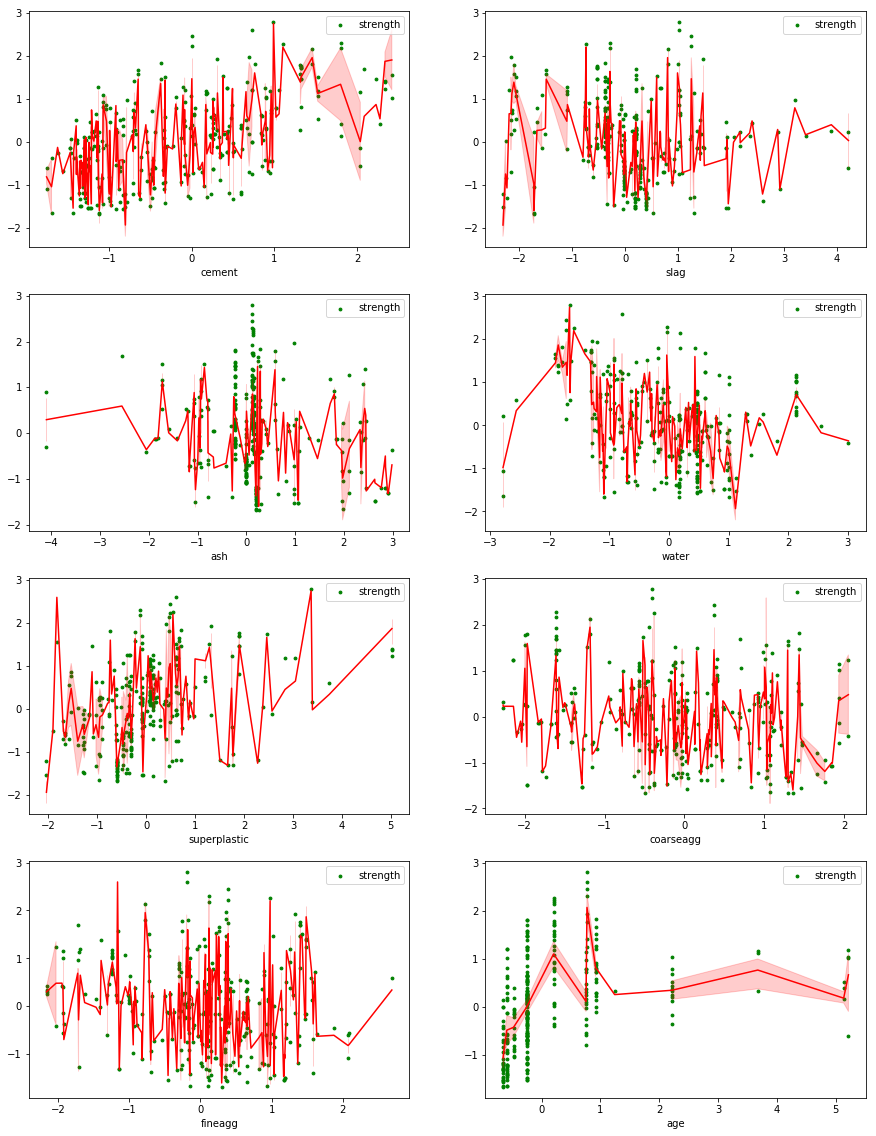

In [119]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
plt.scatter(X_concrete_test.cement,Y_concrete_test,s=8,c='g')
sns.lineplot(X_concrete_test.cement, y_pred_xgb_5,c='r')
plt.subplot(4,2,2)
plt.scatter(X_concrete_test.slag,Y_concrete_test,s=8,c='g')
sns.lineplot(X_concrete_test.slag, y_pred_xgb_5,c='r')
plt.subplot(4,2,3)
plt.scatter(X_concrete_test.ash,Y_concrete_test,s=8,c='g')
sns.lineplot(X_concrete_test.ash, y_pred_xgb_5,c='r')
plt.subplot(4,2,4)
plt.scatter(X_concrete_test.water,Y_concrete_test,s=8,c='g')
sns.lineplot(X_concrete_test.water, y_pred_xgb_5,c='r')
plt.subplot(4,2,5)
plt.scatter(X_concrete_test.superplastic,Y_concrete_test,s=8,c='g')
sns.lineplot(X_concrete_test.superplastic, y_pred_xgb_5,c='r')
plt.subplot(4,2,6)
plt.scatter(X_concrete_test.coarseagg,Y_concrete_test,s=8,c='g')
sns.lineplot(X_concrete_test.coarseagg, y_pred_xgb_5,c='r')
plt.subplot(4,2,7)
plt.scatter(X_concrete_test.fineagg,Y_concrete_test,s=8,c='g')
sns.lineplot(X_concrete_test.fineagg, y_pred_xgb_5,c='r')
plt.subplot(4,2,8)
plt.scatter(X_concrete_test.age,Y_concrete_test,s=8,c='g')
sns.lineplot(X_concrete_test.age, y_pred_xgb_5,c='r')